In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df
    for start, stop, column_name in datadictionary:
        pd[column_name] = pd.to_numeric(pd[column_name])

In [49]:
# https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm 
# This notebook uses Nat1988.txt which is about 810 Mb.
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat1988.zip 

# Read the large (215 x 3.9million cells) data file into a pandas frame 
n85n = pd.read_csv("LinkCO85/LinkCO85USnum.dat", header=None)

In [60]:
# Load in a file of three columns into a list of lists, the first two elements of which are integers.
# This is our table of column positions and column names
key1985 = []
for line in open("KEY1985n.txt"):
    fields = line.strip().split()
    key1985.append([int(fields[0]), int(fields[1]), fields[2]])
key1985
# I really thought vaginal/caesarian birth "mode of delivery" would be in here but I can't find it in 1988.

[[231, 234, 'ICDCODE'],
 [235, 237, 'CAUSERECODE'],
 [230, 230, 'PLACEOFACCIDENT'],
 [226, 227, 'AGERECODE38'],
 [58, 61, 'MATERNALAGE'],
 [90, 90, 'ATTENDANT'],
 [89, 89, 'PLACE'],
 [85, 85, 'BIRTHORDERRECODE'],
 [43, 44, 'BIRTHWEIGHTGRAMS'],
 [38, 38, 'SEX'],
 [36, 36, 'RACE'],
 [37, 37, 'RACERECODE3'],
 [39, 40, 'WEEKSGESTATION']]

In [62]:


df = parse_natality(n85n, key1985)
df.head()

,ICDCODE,CAUSERECODE,PLACEOFACCIDENT,AGERECODE38,MATERNALAGE,ATTENDANT,PLACE,BIRTHORDERRECODE,BIRTHWEIGHTGRAMS,SEX,RACE,RACERECODE3,WEEKSGESTATION
0,7531,330,,00,1806,1,1,1,20,1,1,1,41
1,7650,440,,00,1907,1,1,1,05,1,2,3,24
2,7718,520,,00,2008,1,1,2,17,2,2,3,31
3,7566,340,,00,2509,1,1,1,15,1,1,1,37
4,7718,520,,02,1806,1,1,1,26,2,1,1,38


In [63]:
df["AGERECODE38"].value_counts()

00    14708
28     3542
29     2882
01     2460
30     1918
02     1663
31     1361
03      997
32      976
33      702
04      639
34      551
35      501
05      457
06      411
36      400
37      394
07      354
38      350
09      325
08      321
10      311
11      268
12      234
13      204
14      200
15      189
18      187
16      183
17      182
19      168
20      162
21      159
24      151
27      144
22      133
23      131
25      127
26      125
Name: AGERECODE38, dtype: int64

In [64]:
df.CAUSERECODE.value_counts()

590    5242
510    3654
500    3634
440    3191
570    2947
       ... 
550       7
060       6
020       4
100       4
450       1
Name: CAUSERECODE, Length: 61, dtype: int64

In [123]:
sids = df.loc[np.where(df.CAUSERECODE=="590")] # 590 is SIDS
print ( len(sids) , "SIDS deaths")
suffocation = df.loc[np.where(df.CAUSERECODE=="630")] # 590 is SIDS
print (len(suffocation), "Suffocation deaths")

5242 SIDS deaths
178 Suffocation deaths


In [68]:
sids.AGERECODE38.value_counts()

29    1425
28    1335
30     904
31     526
32     297
33     165
34      99
35      64
27      32
24      30
37      27
36      27
26      25
20      21
21      21
18      20
22      20
25      19
38      19
16      17
17      15
19      14
13      11
08      10
14      10
23      10
06       9
15       9
11       8
10       8
09       7
00       7
03       6
07       6
01       5
04       4
05       4
12       3
02       3
Name: AGERECODE38, dtype: int64

In [72]:
sidshisto = sids.AGERECODE38.value_counts().sort_index()

<BarContainer object of 39 artists>

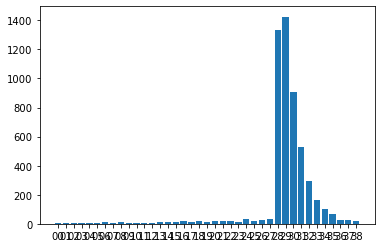

In [76]:
plt.bar(sidshisto.index, sidshisto.values)

<BarContainer object of 19 artists>

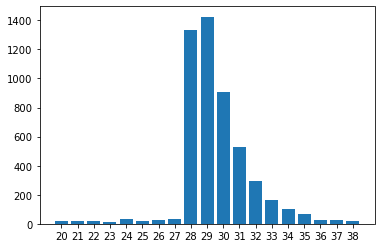

In [75]:
plt.bar(sidshisto.index[20:], sidshisto.values[20:])

<BarContainer object of 11 artists>

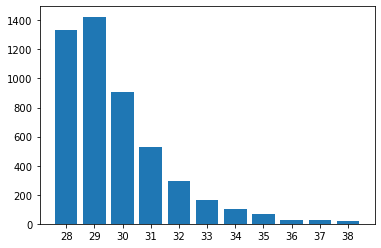

In [77]:
plt.bar(sidshisto.index[28:], sidshisto.values[28:])

In [103]:
sidsbymonth=sidshisto.iloc[28:]
sidsbymonth.index = pd.to_numeric(sidsbymonth.index)-27
sidsbymonth

1     1335
2     1425
3      904
4      526
5      297
6      165
7       99
8       64
9       27
10      27
11      19
Name: AGERECODE38, dtype: int64

In [107]:
sidshist = pd.concat([pd.DataFrame( [sidshisto.iloc[0:28].values.sum()]) , sidsbymonth] )

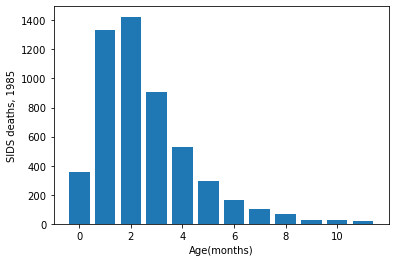

In [125]:
plt.bar(sidshist.index, sidshist[0])
plt.xlabel("Age(months)")
plt.ylabel("SIDS deaths, 1985")
plt.savefig("SIDSDEATHS1985.eps")

In [126]:
sidshist


,0
0,354
1,1335
2,1425
3,904
4,526
5,297
6,165
7,99
8,64
9,27


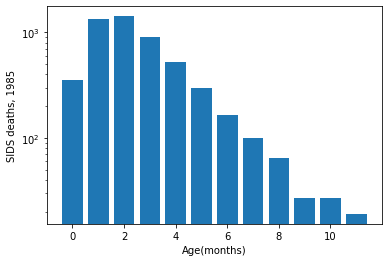

In [128]:
fix, ax = plt.subplots()
plt.bar(sidshist.index, sidshist[0])

ax.set_yscale('log')
plt.xlabel("Age(months)")
plt.ylabel("SIDS deaths, 1985")
plt.savefig("SIDSDEATHS1985.eps")

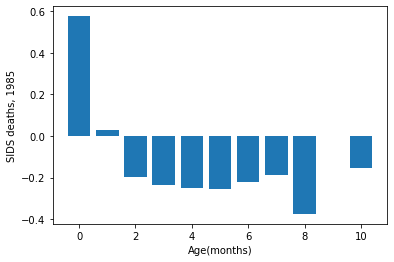

In [136]:
fix, ax = plt.subplots()
plt.bar(sidshist.index[:-1], np.diff(np.log(sidshist[0]))/np.log(10))

#ax.set_yscale('log')
plt.xlabel("Age(months)")
plt.ylabel("SIDS deaths, 1985")
plt.savefig("SIDSDEATHS1985.eps")

In [142]:
10**(-0.23)

0.5888436553555889

In [143]:
np.exp(-0.23* np.log(10))

0.5888436553555889

In [144]:
0.23 * np.log(10)

0.5295945713886305

In [147]:
x = np.arange(0,28)
y = np.exp(-0.53 /30.5 * x)

In [148]:
d1 = y[0]

In [149]:
d2 = y[1:7].sum()
d3 = y[7:27].sum()

In [150]:
(d1,d2,d3)

(1.0, 5.648444045860154, 15.089905672287157)

In [152]:
d1+d2+d3

21.73834971814731

In [154]:
np.array([d1,d2,d3]) * 31/ 21.738

array([ 1.42607416,  8.05510007, 21.51932449])

In [157]:
(6-0.96)**2 / 0.96 + (11-5.79)**2 / 5.79 + (10-20.25)**2 / 20.25

36.336371777649845

In [158]:
(6-0.96)**2 / 0.96 , (11-5.79)**2 / 5.79 , (10-20.25)**2 / 20.25

(26.460000000000004, 4.688100172711572, 5.188271604938271)

In [159]:
(6-1.42)**2 / 1.42 , (11-8.06)**2/8.06, (10-20.25)**2 / 20.25

(14.77211267605634, 1.0724069478908185, 5.188271604938271)

In [160]:
(6-1.42)**2 / 1.42+(11-8.06)**2/8.06+ (10-20.25)**2 / 20.25

21.03279122888543

In [162]:
from  scipy.stats import chisquare


In [165]:
chisquare ([6,11,10], [0.96,5.79,20.25])

Power_divergenceResult(statistic=36.336371777649845, pvalue=1.2872328734886733e-08)

In [164]:
chisquare ([6,11,10], [1.42,8.06,20.25])

Power_divergenceResult(statistic=21.03279122888543, pvalue=2.7088653319804945e-05)

In [166]:
# So, nonuniform rate, informed by sensible and relevant data,
# makes the observed counts
2.7088653319804945e-05/1.2872328734886733e-08

2104.4096897858867

In [ ]:
# times more likely

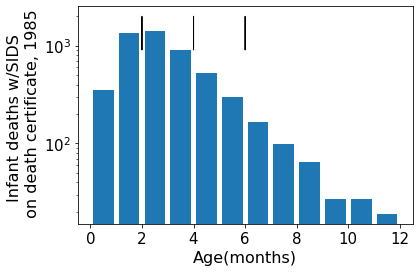

In [183]:
fix, ax = plt.subplots()
plt.bar(np.arange(0,12)+.5, sidshist[0])

ax.set_yscale('log')
plt.xlabel("Age(months)", fontsize=16)
plt.ylabel("Infant deaths w/SIDS \n on death certificate, 1985", fontsize=16)
plt.arrow(2,2000, 0,-1000, head_length=100)
plt.arrow(4,2000, 0,-1000, head_length=100)
plt.arrow(6,2000, 0,-1000, head_length=100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig("SIDSDEATHS1985.eps")


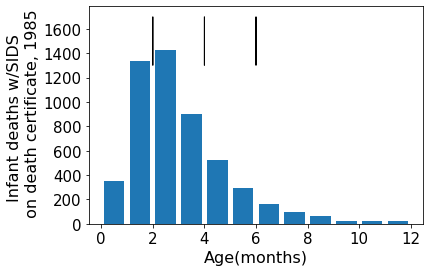

In [186]:
fix, ax = plt.subplots()
plt.bar(np.arange(0,12)+.5, sidshist[0])
#ax.set_yscale('log')

plt.xlabel("Age(months)", fontsize=16)
plt.ylabel("Infant deaths w/SIDS \n on death certificate, 1985", fontsize=16)
plt.arrow(2,1700, 0,-300, head_length=100)
plt.arrow(4,1700, 0,-300, head_length=100)
plt.arrow(6,1700, 0,-300, head_length=100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("SIDS1985.eps")